# Heart Disease UCI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

from xgboost import XGBRFClassifier, plot_tree

In [2]:
df = pd.read_csv('hd-uci.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().values.any()

False

In [6]:
df.age = pd.cut(df.age, [20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

df.trestbps = pd.cut(df.trestbps, [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], labels=['90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180', '180-190', '190-200'])

df.chol = pd.cut(df.chol, [120, 170, 220, 270, 320, 370, 420, 470, 520, 570], labels=['120-170', '170-220', '220-270', '270-320', '320-370', '370-420', '420-470', '470-520', '520-570'])

df.thalach = pd.cut(df.thalach, [70, 90, 110, 130, 150, 170, 190, 210], labels=['70-90', '90-110', '110-130', '130-150', '150-170', '170-190', '190-210'])

df.oldpeak = pd.cut(df.oldpeak, [0, 1, 2, 3, 4, 5, 6, 7], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7'], include_lowest=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60-70,1,3,140-150,220-270,1,0,130-150,0,2-3,0,0,1,1
1,30-40,1,2,120-130,220-270,0,1,170-190,0,3-4,0,0,2,1
2,40-50,0,1,120-130,170-220,0,0,170-190,0,1-2,2,0,2,1
3,50-60,1,1,110-120,220-270,0,1,170-190,0,0-1,2,0,2,1
4,50-60,0,0,110-120,320-370,0,1,150-170,1,0-1,2,0,2,1


In [7]:
columns = ['age', 'sex', 'cp', 'fbs', 'trestbps', 'chol', 'thalach', 'oldpeak', 'restecg', 'exang', 'slope', 'ca', 'thal']

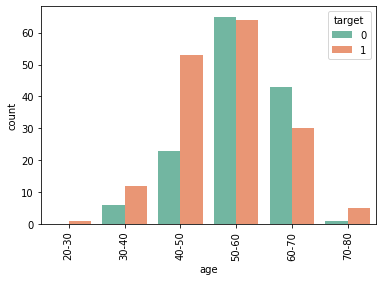

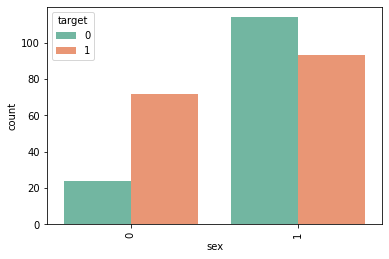

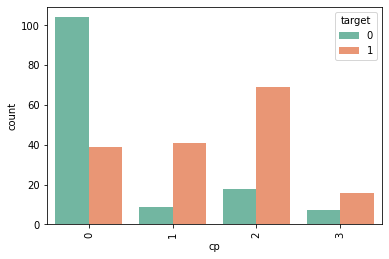

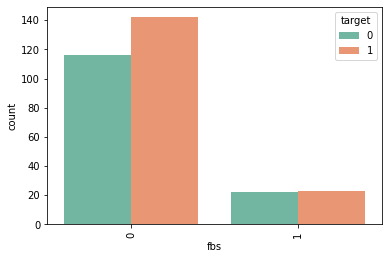

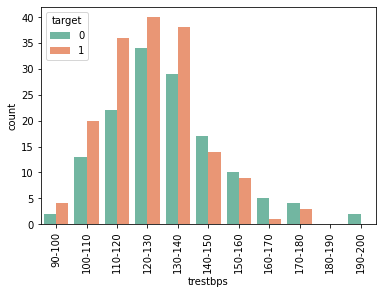

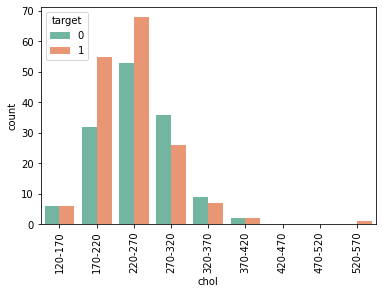

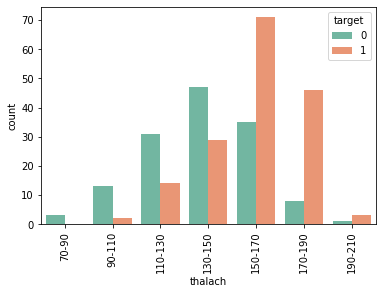

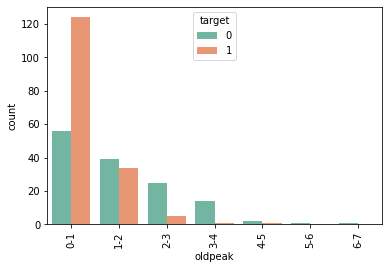

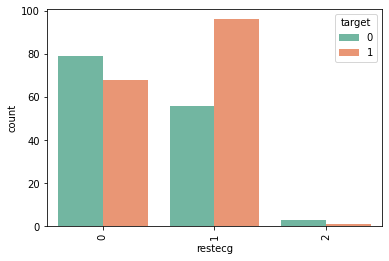

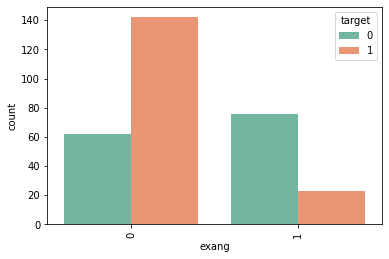

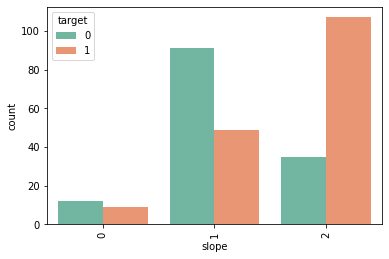

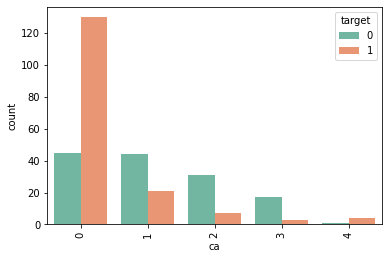

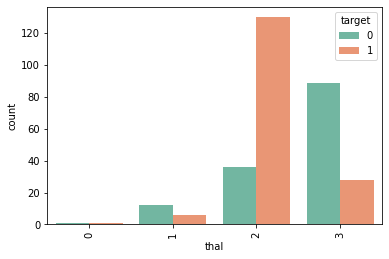

In [8]:
for col in columns:
    plt.figure()
    sns.countplot(x=col, hue="target", data=df, palette="Set2", orient='h')
    plt.xticks(rotation=90)
    plt.show()

In [9]:
X = df[columns]
y = df['target']

In [10]:
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

full_pipeline = ColumnTransformer([
    ('categorical', cat_pipeline, columns)
])

X = pd.DataFrame(full_pipeline.fit_transform(X))

In [11]:
X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
xgb_model = XGBRFClassifier(use_label_encoder=False,
                             learning_rate=0.01, n_jobs=-1,
                             n_estimators=50, max_depth=4)

xgb_model.fit(X_train, y_train,
             early_stopping_rounds=2,
             eval_set=[(X_test, y_test)],
             verbose=5)

[01:21:47] WARNING: /tmp/pip-install-e575mnq2/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68699


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.01,
                max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=50, n_jobs=-1,
                num_parallel_tree=50, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', use_label_encoder=False,
                validate_parameters=1, verbosity=None)

In [13]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9032258064516129

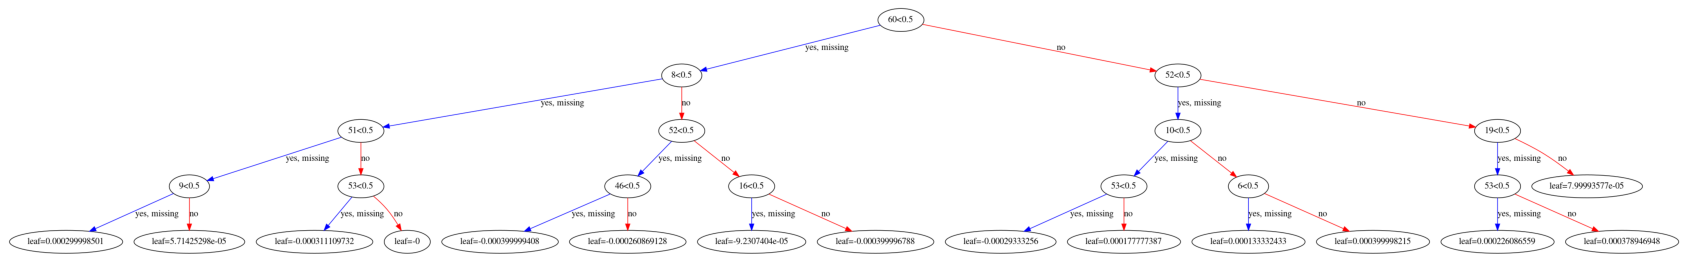

In [14]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_model, num_trees=1, ax=ax)
plt.show()